Eşik değerin üzerinde 17 trafik olayı tespit edildi
17 trafik olayı için temel trafik yönetimi uygulanıyor
17 trafik olayı için temel trafik yönetimi uygulanıyor
17 trafik olayı için ileri trafik yönetimi uygulanıyor
2024-01-01 00:42:00 tarihinde olay işleniyor
2024-01-01 02:54:00 tarihinde olay işleniyor
2024-01-01 05:46:00 tarihinde olay işleniyor
2024-01-01 07:14:00 tarihinde olay işleniyor
2024-01-01 08:05:00 tarihinde olay işleniyor
2024-01-01 08:17:00 tarihinde olay işleniyor
2024-01-01 13:54:00 tarihinde olay işleniyor
2024-01-01 14:29:00 tarihinde olay işleniyor
2024-01-01 14:30:00 tarihinde olay işleniyor
2024-01-01 15:10:00 tarihinde olay işleniyor
2024-01-01 16:03:00 tarihinde olay işleniyor
2024-01-01 16:16:00 tarihinde olay işleniyor
2024-01-01 17:02:00 tarihinde olay işleniyor
2024-01-01 19:14:00 tarihinde olay işleniyor
2024-01-01 22:06:00 tarihinde olay işleniyor
2024-01-01 22:29:00 tarihinde olay işleniyor
2024-01-01 23:57:00 tarihinde olay işleniyor


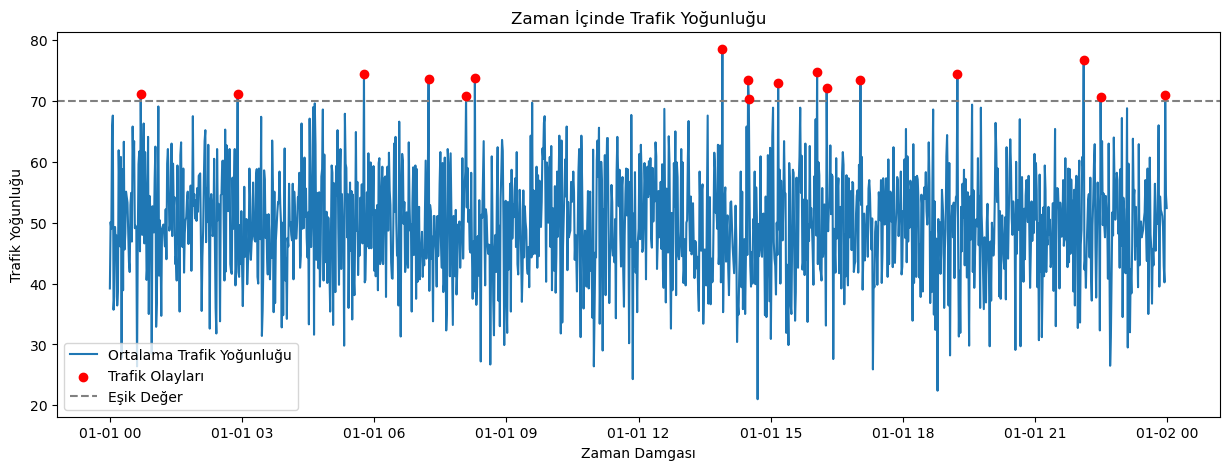

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gözlemci Örüntüsü
class TrafikVerisi:
    def __init__(self):
        self._gozlemciler = []
        self._trafik_verisi = None

    def gozlemci_ekle(self, gozlemci):
        self._gozlemciler.append(gozlemci)

    def gozlemci_cikar(self, gozlemci):
        self._gozlemciler.remove(gozlemci)

    def gozlemcilere_bildirim(self):
        for gozlemci in self._gozlemciler:
            gozlemci.guncelle(self._trafik_verisi)

    def trafik_verisi_ayarla(self, trafik_verisi):
        self._trafik_verisi = trafik_verisi
        self.gozlemcilere_bildirim()

class TrafikGozlemci:
    def guncelle(self, trafik_verisi):
        raise NotImplementedError("Alt sınıf bu soyut metodu uygulamalı")

class TrafikAnalizci(TrafikGozlemci):
    def __init__(self, trafik_yoneticisi):
        self.trafik_yoneticisi = trafik_yoneticisi

    def guncelle(self, trafik_verisi):
        ortalama_trafik_yogunlugu = trafik_verisi.groupby('zaman_damgasi')['trafik_yogunlugu'].mean()
        self.trafik_olaylarini_tespit_et(ortalama_trafik_yogunlugu)

    def trafik_olaylarini_tespit_et(self, ortalama_trafik_yogunlugu):
        esik_deger = 70
        trafik_olaylari = ortalama_trafik_yogunlugu[ortalama_trafik_yogunlugu > esik_deger]
        print(f"Eşik değerin üzerinde {len(trafik_olaylari)} trafik olayı tespit edildi")
        self.trafik_yoneticisi.trafik_yonetimi(trafik_olaylari)

# Strateji Örüntüsü
class TrafikYonetimStratejisi:
    def uygula(self, trafik_olaylari):
        raise NotImplementedError("Alt sınıf bu soyut metodu uygulamalı")

class TemelTrafikYonetimStratejisi(TrafikYonetimStratejisi):
    def uygula(self, trafik_olaylari):
        print(f"{len(trafik_olaylari)} trafik olayı için temel trafik yönetimi uygulanıyor")

class IleriTrafikYonetimStratejisi(TrafikYonetimStratejisi):
    def uygula(self, trafik_olaylari):
        print(f"{len(trafik_olaylari)} trafik olayı için ileri trafik yönetimi uygulanıyor")
        for olay in trafik_olaylari.index:
            print(f"{olay} tarihinde olay işleniyor")

class TrafikYoneticisi:
    def __init__(self, strateji: TrafikYonetimStratejisi):
        self._strateji = strateji

    def strateji_ayarla(self, strateji: TrafikYonetimStratejisi):
        self._strateji = strateji

    def trafik_yonetimi(self, trafik_olaylari):
        self._strateji.uygula(trafik_olaylari)

# Rastgele trafik sensör verisi oluşturma
def sensor_verisi_olustur(sensor_sayisi, veri_noktasi_sayisi):
    veri = []
    for i in range(sensor_sayisi):
        sensor_id = f"Sensor_{i+1}"
        trafik_verisi = np.random.randint(0, 100, veri_noktasi_sayisi)
        zaman_damgalari = pd.date_range(start='2024-01-01', periods=veri_noktasi_sayisi, freq='T')
        sensor_df = pd.DataFrame({
            'sensor_id': sensor_id,
            'zaman_damgasi': zaman_damgalari,
            'trafik_yogunlugu': trafik_verisi
        })
        veri.append(sensor_df)
    return pd.concat(veri)

# Trafik verilerini analiz etme
def trafik_verisini_analiz_et(sensor_verisi):
    ortalama_trafik_yogunlugu = sensor_verisi.groupby('zaman_damgasi')['trafik_yogunlugu'].mean()
    return ortalama_trafik_yogunlugu

# Trafik yoğunluğu olaylarını tespit etme
def trafik_olaylarini_tespit_et(ortalama_trafik_yogunlugu, esik_deger):
    olaylar = ortalama_trafik_yogunlugu[ortalama_trafik_yogunlugu > esik_deger]
    return olaylar

# Trafik yoğunluğu verilerini görselleştirme
def trafik_verisini_gorsellestir(ortalama_trafik_yogunlugu, trafik_olaylari, esik_deger):
    plt.figure(figsize=(15, 5))
    plt.plot(ortalama_trafik_yogunlugu.index, ortalama_trafik_yogunlugu.values, label='Ortalama Trafik Yoğunluğu')
    plt.scatter(trafik_olaylari.index, trafik_olaylari.values, color='red', label='Trafik Olayları', zorder=5)
    plt.axhline(y=esik_deger, color='gray', linestyle='--', label='Eşik Değer')
    plt.xlabel('Zaman Damgası')
    plt.ylabel('Trafik Yoğunluğu')
    plt.title('Zaman İçinde Trafik Yoğunluğu')
    plt.legend()
    plt.show()

# Kullanım
sensor_verisi = sensor_verisi_olustur(10, 1440)

# Strateji Örüntüsü
temel_strateji = TemelTrafikYonetimStratejisi()
ileri_strateji = IleriTrafikYonetimStratejisi()
trafik_yoneticisi = TrafikYoneticisi(temel_strateji)

# Gözlemci Örüntüsü
trafik_verisi = TrafikVerisi()
analizci = TrafikAnalizci(trafik_yoneticisi)
trafik_verisi.gozlemci_ekle(analizci)
trafik_verisi.trafik_verisi_ayarla(sensor_verisi)

ortalama_trafik_yogunlugu = trafik_verisini_analiz_et(sensor_verisi)
esik_deger = 70
trafik_olaylari = trafik_olaylarini_tespit_et(ortalama_trafik_yogunlugu, esik_deger)
trafik_yoneticisi.trafik_yonetimi(trafik_olaylari)

# Stratejiyi değiştirme
trafik_yoneticisi.strateji_ayarla(ileri_strateji)
trafik_yoneticisi.trafik_yonetimi(trafik_olaylari)

# Veriyi görselleştirme
trafik_verisini_gorsellestir(ortalama_trafik_yogunlugu, trafik_olaylari, esik_deger)
